<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap09/9_1_L2_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 9.1: L2 Regularization**

This notebook investigates adding L2 regularization to the loss function for the Gabor model as in figure 9.1.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [2]:
# Let's create our training data 30 pairs {x_i, y_i}
# We'll try to fit the Gabor model to these data
data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]])

In [3]:
# Gabor model definition
def model(phi,x):
  sin_component = np.sin(phi[0] + 0.06 * phi[1] * x)
  gauss_component = np.exp(-(phi[0] + 0.06 * phi[1] * x) * (phi[0] + 0.06 * phi[1] * x) / 32)
  y_pred= sin_component * gauss_component
  return y_pred

In [4]:
# Draw model
def draw_model(data,model,phi,title=None):
  x_model = np.arange(-15,15,0.1)
  y_model = model(phi,x_model)

  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([-15,15]);ax.set_ylim([-1,1])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  if title is not None:
    ax.set_title(title)
  plt.show()

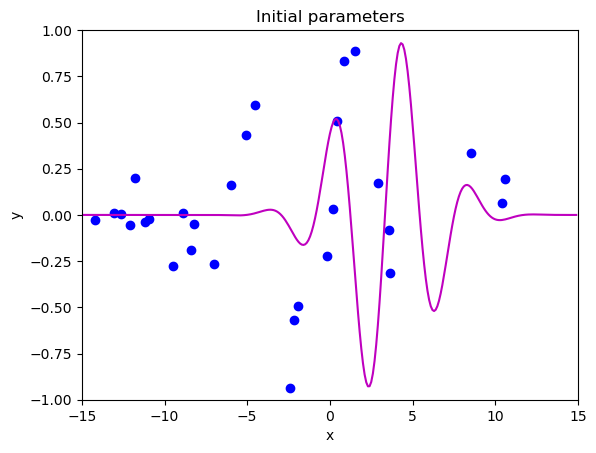

In [5]:
# Initialize the parameters and draw the model
phi = np.zeros((2,1))
phi[0] =  -5     # Horizontal offset
phi[1] =  25     # Frequency
draw_model(data,model,phi, "Initial parameters")


Now let's
compute the sum of squares loss for the training data

In [6]:
def compute_loss(data_x, data_y, model, phi):
  pred_y = model(phi, data_x)
  loss = np.sum((pred_y-data_y)*(pred_y-data_y))
  return loss

Now let's plot the whole loss function

In [7]:
# Define pretty colormap
my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
r = np.floor(my_colormap_vals_dec/(256*256))
g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

def draw_loss_function(compute_loss, data,  model, my_colormap, phi_iters = None):

  # Make grid of offset/frequency values to plot
  offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
  loss_mesh = np.zeros_like(freqs_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(freqs_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(offsets_mesh,freqs_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(offsets_mesh,freqs_mesh,loss_mesh,20,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([2.5,22.5])
  ax.set_xlabel('Offset $\phi_{0}$'); ax.set_ylabel('Frequency, $\phi_{1}$')
  plt.show()

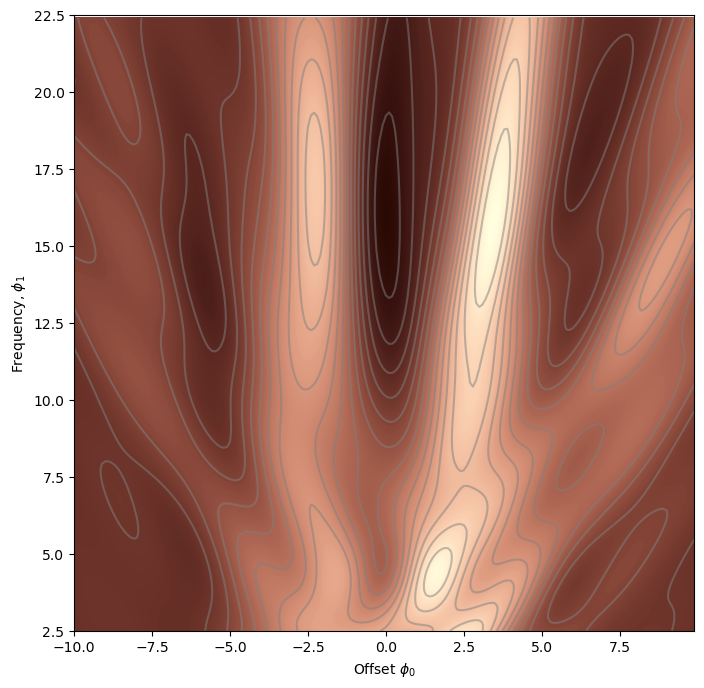

In [8]:
draw_loss_function(compute_loss, data, model, my_colormap)

Now let's compute the gradient vector for a given set of parameters:

\begin{equation}
\frac{\partial L}{\partial \boldsymbol\phi} = \begin{bmatrix}\frac{\partial L}{\partial \phi_0} \\\frac{\partial L}{\partial \phi_1} \end{bmatrix}.
\end{equation}

In [9]:
# These came from writing out the expression for the sum of squares loss and taking the
# derivative with respect to phi0 and phi1. It was a lot of hassle to get it right!
def gabor_deriv_phi0(data_x,data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = cos_component * gauss_component - sin_component * gauss_component * x / 16
    deriv = 2* deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def gabor_deriv_phi1(data_x, data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = 0.06 * data_x * cos_component * gauss_component - 0.06 * data_x*sin_component * gauss_component * x / 16
    deriv = 2*deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def compute_gradient(data_x, data_y, phi):
    dl_dphi0 = gabor_deriv_phi0(data_x, data_y, phi[0],phi[1])
    dl_dphi1 = gabor_deriv_phi1(data_x, data_y, phi[0],phi[1])
    # Return the gradient
    return np.array([[dl_dphi0],[dl_dphi1]])

Now we are ready to find the minimum.  For simplicity, we'll just use regular (non-stochastic) gradient descent with a fixed learning rate.

In [10]:
def gradient_descent_step(phi, data,  model):
  # Step 1:  Compute the gradient
  gradient = compute_gradient(data[0,:],data[1,:], phi)
  # Step 2:  Update the parameters -- note we want to search in the negative (downhill direction)
  alpha = 0.1
  phi = phi - alpha * gradient
  return phi

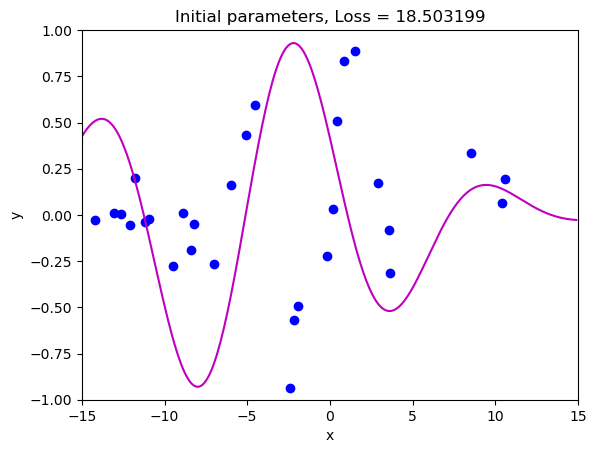

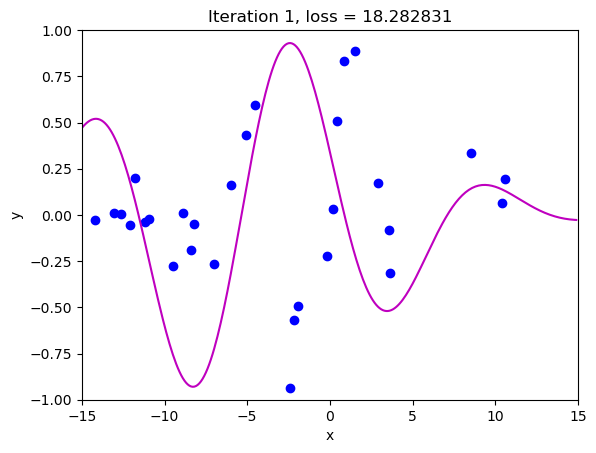

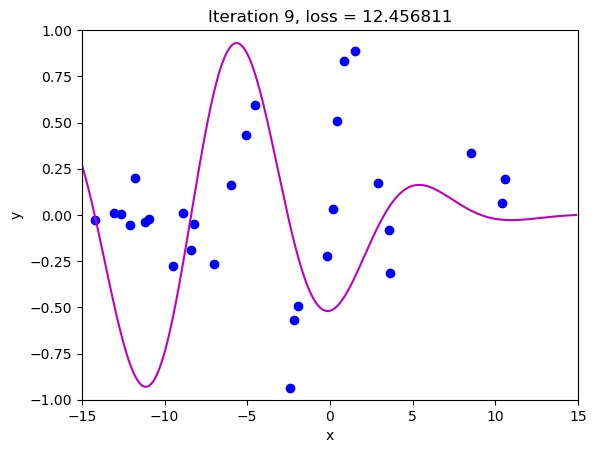

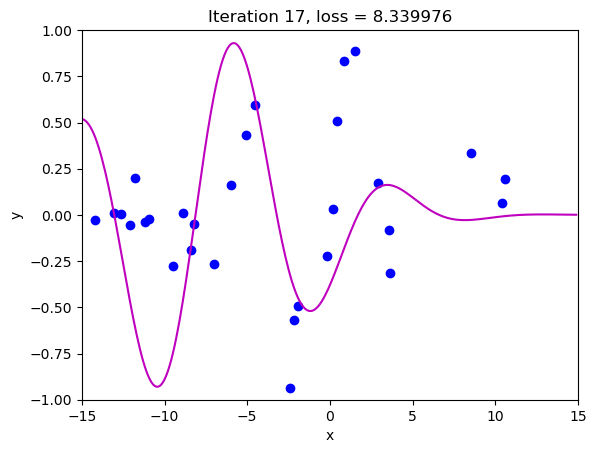

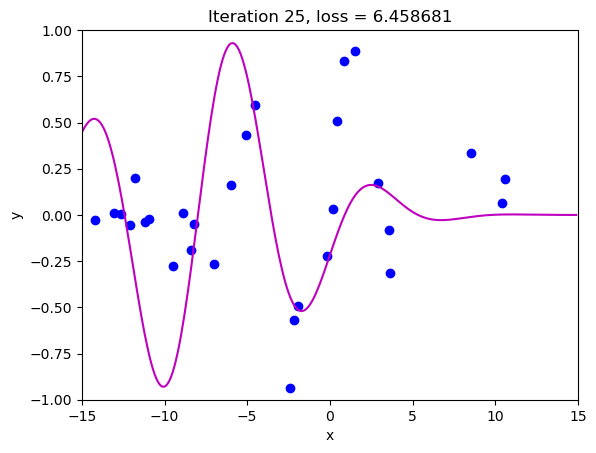

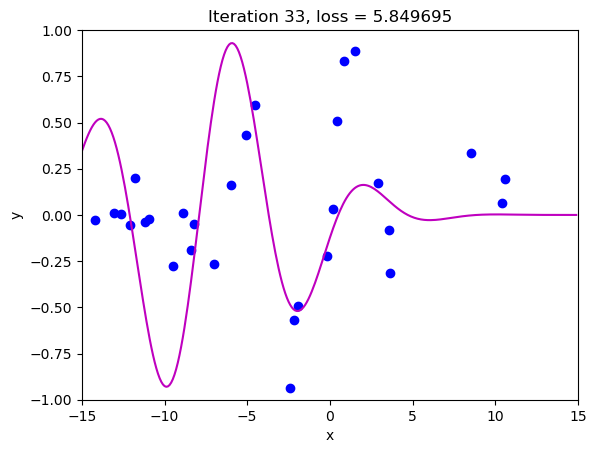

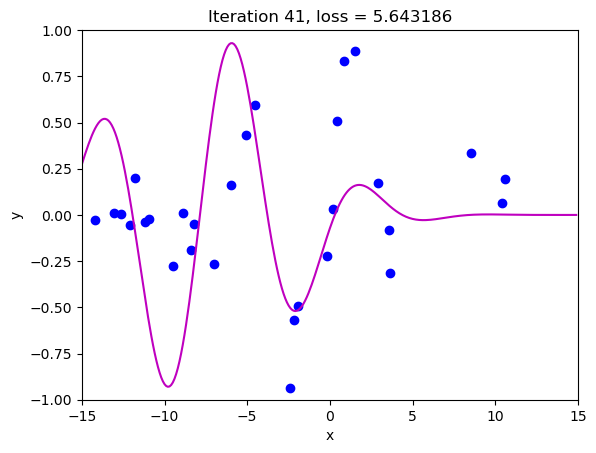

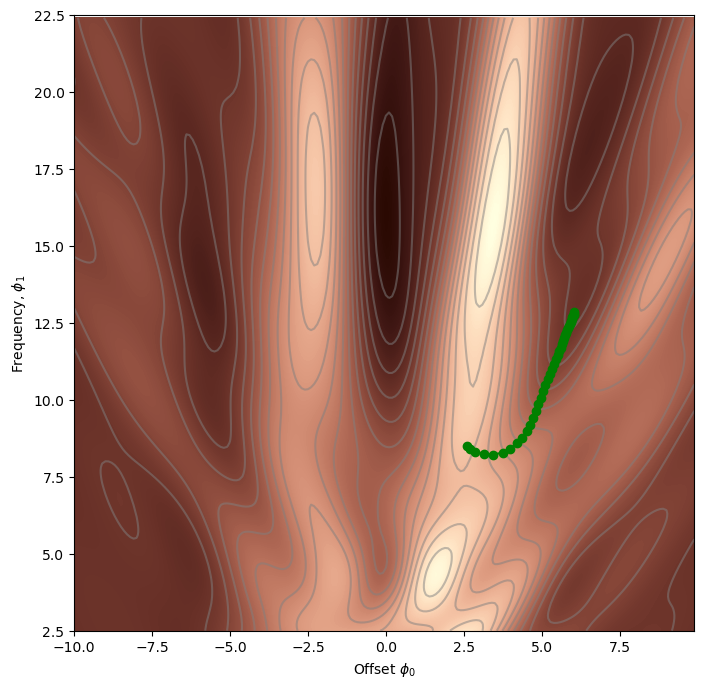

In [11]:
# Initialize the parameters
n_steps = 41
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 2.6
phi_all[1,0] = 8.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step(phi_all[:,c_step:c_step+1],data, model)
  # Measure loss and draw model every 8th step
  if c_step % 8 == 0:
    loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

draw_loss_function(compute_loss, data, model, my_colormap, phi_all)


Unfortunately, when we start from this position, the solution descends to a local minimum and the final model doesn't fit well.<br><br>

But what if we had some weak knowledge that the solution was in the vicinity of $\phi_0=0.0$, $\phi_{1} = 12.5$ (the center of the plot)?

Let's add a term to the loss function that penalizes solutions that deviate from this point.  

\begin{equation}
L'[\boldsymbol\phi] = L[\boldsymbol\phi]+ \lambda\cdot \Bigl(\phi_{0}^2+(\phi_1-12.5)^2\Bigr)
\end{equation}

where $\lambda$ controls the relative importance of the original loss and the regularization term

In [12]:
# Computes the regularization term
def compute_reg_term(phi0,phi1):
  # TODO compute the regularization term (term in large brackets in the above equation)
  # Replace this line
  reg_term = np.power(phi0, 2) + np.power(phi1 - 12.5, 2)

  return reg_term

# Define the loss function
# Note I called the weighting lambda_ to avoid confusing it with python lambda functions
def compute_loss2(data_x, data_y, model, phi, lambda_):
  pred_y = model(phi, data_x)
  loss = np.sum((pred_y-data_y)*(pred_y-data_y))
  # Add the new term to the loss
  loss = loss + lambda_ * compute_reg_term(phi[0],phi[1])

  return loss

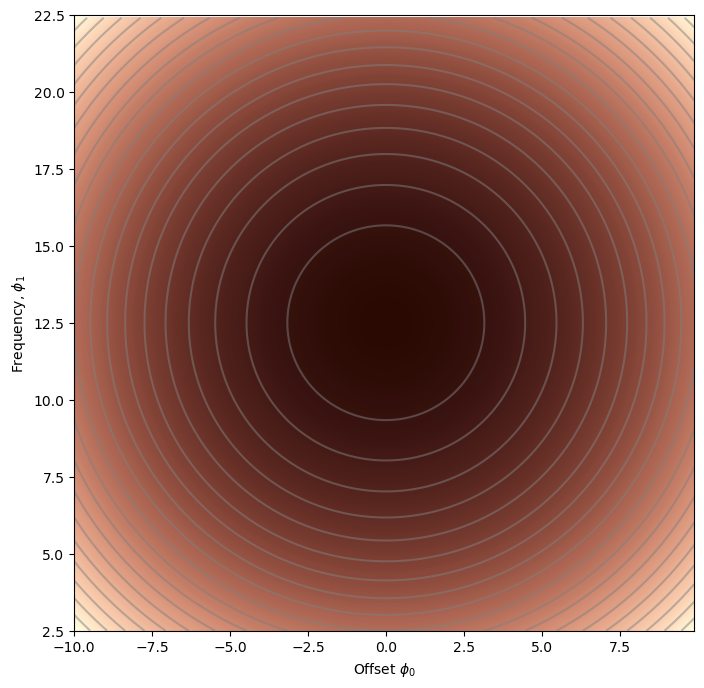

In [13]:
# Code to draw the regularization function
def draw_reg_function():

  # Make grid of offset/frequency values to plot
  offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
  loss_mesh = np.zeros_like(freqs_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(freqs_mesh):
     loss_mesh[idslope] = compute_reg_term(offsets_mesh[idslope], slope)

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(offsets_mesh,freqs_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(offsets_mesh,freqs_mesh,loss_mesh,20,colors=['#80808080'])
  ax.set_ylim([2.5,22.5])
  ax.set_xlabel('Offset $\phi_{0}$'); ax.set_ylabel('Frequency, $\phi_{1}$')
  plt.show()

# Draw the regularization function.  It should look similar to figure 9.1b
draw_reg_function()

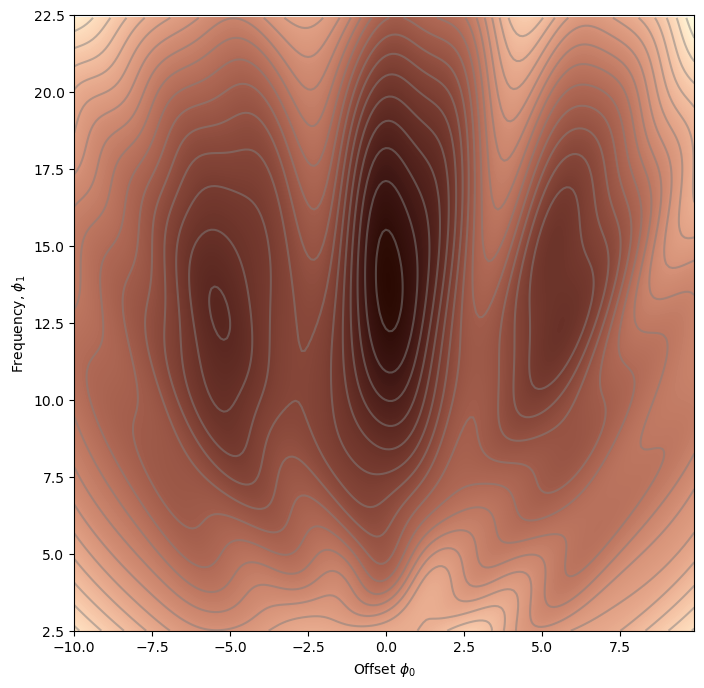

In [17]:
# Code to draw loss function with regularization
def draw_loss_function_reg(data,  model, lambda_, my_colormap, phi_iters = None):

  # Make grid of offset/frequency values to plot
  offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
  loss_mesh = np.zeros_like(freqs_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(freqs_mesh):
     loss_mesh[idslope] = compute_loss2(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]), lambda_)

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(offsets_mesh,freqs_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(offsets_mesh,freqs_mesh,loss_mesh,20,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([2.5,22.5])
  ax.set_xlabel('Offset $\phi_{0}$'); ax.set_ylabel('Frequency, $\phi_{1}$')
  plt.show()

# This should look something like figure 9.1c
draw_loss_function_reg(data, model, 0.2, my_colormap)

In [18]:
# TODO -- Experiment with different values of the regularization weight lambda_
# What do you predict will happen when it is very small (e.g. 0.01)?
# What do you predict will happen when it is large (e.g, 1.0)?
# What happens to the loss at the global minimum when we add the regularization term?
# Does it go up?  Go down?  Stay the same?

Now we'll compute the derivatives $\frac{\partial L'}{\partial\phi_0}$ and $\frac{\partial L'}{\partial\phi_1}$ of the regularized loss function:

\begin{equation}
L'[\boldsymbol\phi] = L[\boldsymbol\phi]+ \lambda\cdot \Bigl(\phi_{0}^2+(\phi_1-12.5)^2\Bigr)
\end{equation}

so that we can perform gradient descent.

In [19]:
def dldphi0(phi, lambda_):
  # TODO compute the derivative with respect to phi0
  # Replace this line:]
  deriv = 2*phi[0]

  return deriv

def dldphi1(phi, lambda_):
  # TODO compute the derivative with respect to phi1
  # Replace this line:]
  deriv = 2*(phi[1] - 12.5)


  return deriv


def compute_gradient2(data_x, data_y, phi, lambda_):
    dl_dphi0 = gabor_deriv_phi0(data_x, data_y, phi[0],phi[1])+dldphi0(np.squeeze(phi), lambda_)
    dl_dphi1 = gabor_deriv_phi1(data_x, data_y, phi[0],phi[1])+dldphi1(np.squeeze(phi), lambda_)
    # Return the gradient
    return np.array([[dl_dphi0],[dl_dphi1]])

def gradient_descent_step2(phi, lambda_, data,  model):
  # Step 1:  Compute the gradient
  gradient = compute_gradient2(data[0,:],data[1,:], phi, lambda_)
  # Step 2:  Update the parameters -- note we want to search in the negative (downhill direction)
  alpha = 0.1
  phi = phi - alpha * gradient
  return phi

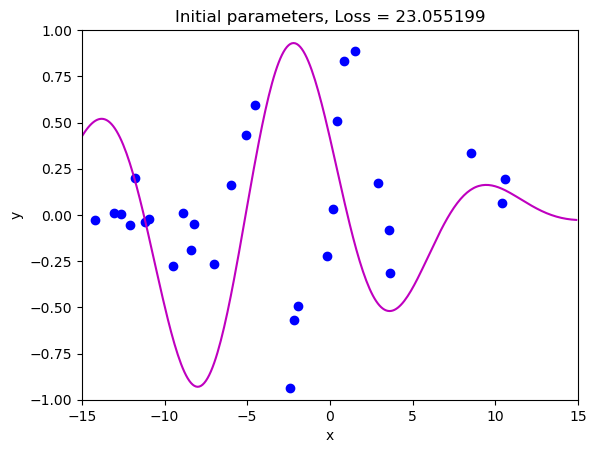

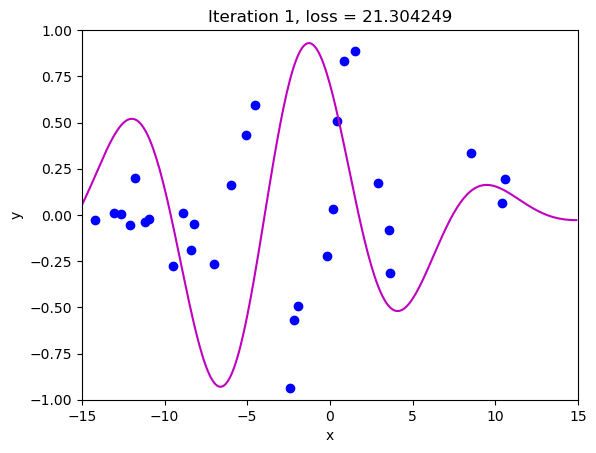

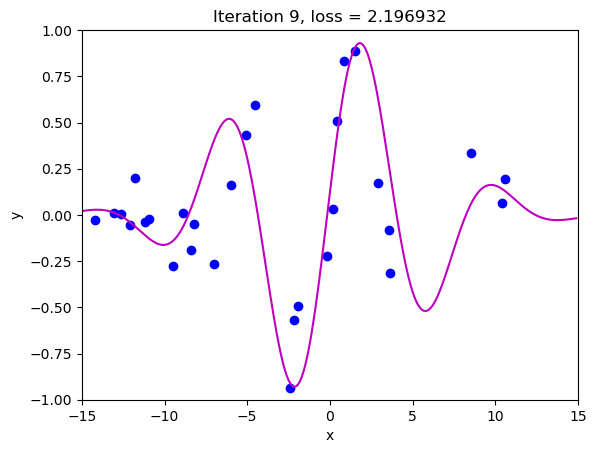

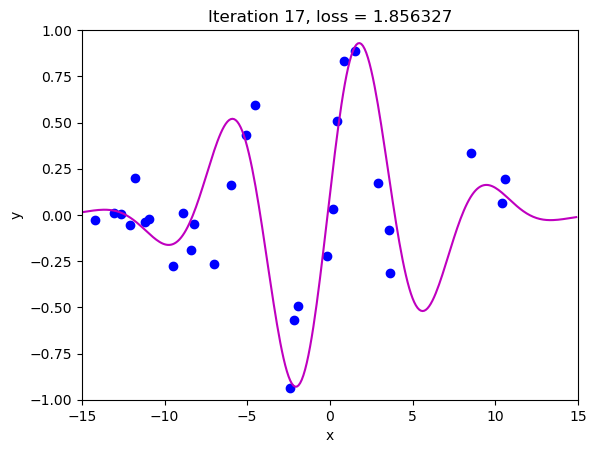

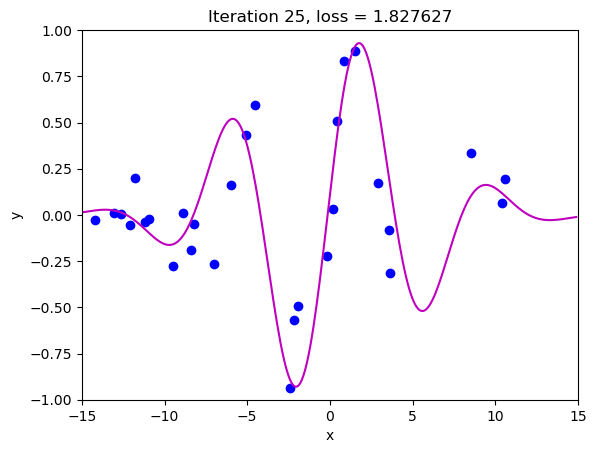

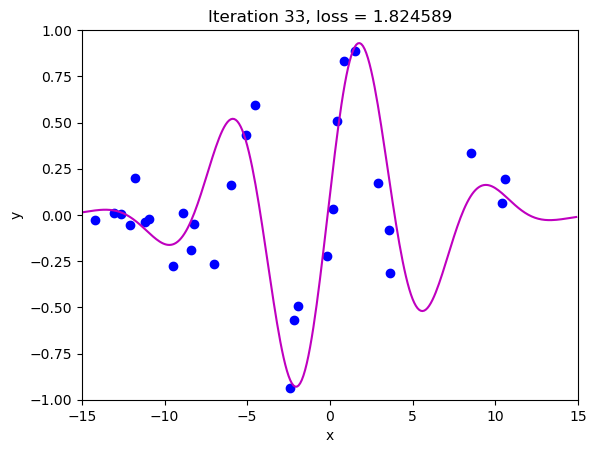

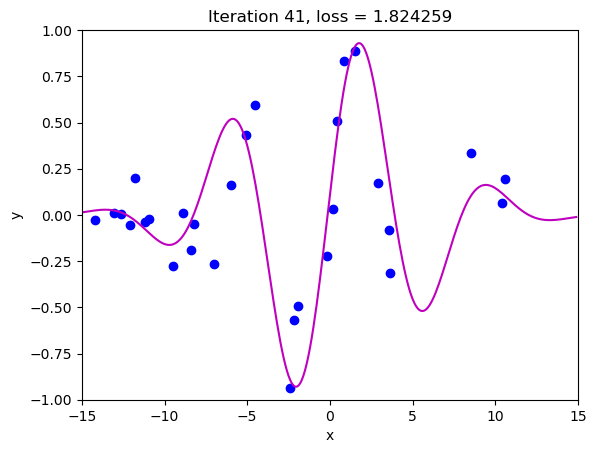

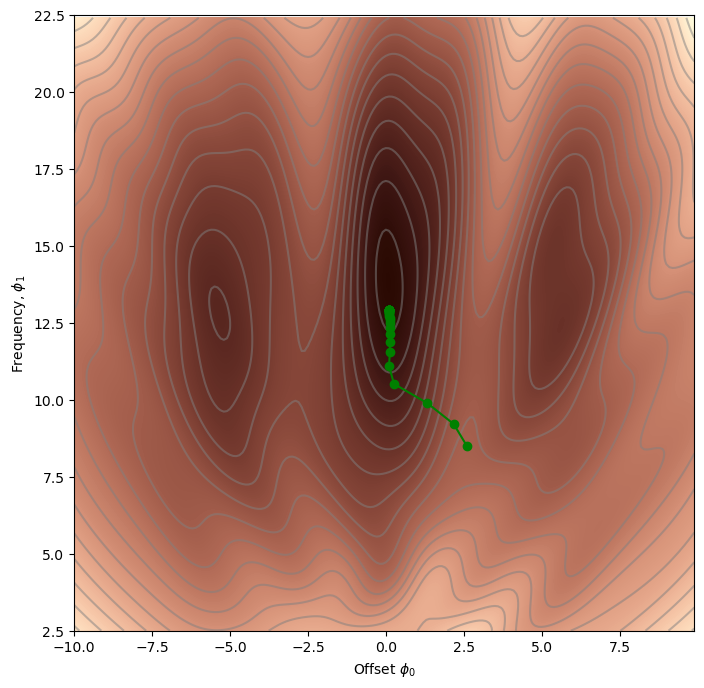

In [20]:
# Finally, let's run gradient descent and draw the result
# Initialize the parameters
n_steps = 41
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 2.6
phi_all[1,0] = 8.5
lambda_ = 0.2

# Measure loss and draw initial model
loss =  compute_loss2(data[0,:], data[1,:], model, phi_all[:,0:1], lambda_)
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step2(phi_all[:,c_step:c_step+1],lambda_, data, model)
  # Measure loss and draw model every 8th step
  if c_step % 8 == 0:
    loss =  compute_loss2(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2], lambda_)
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

draw_loss_function_reg(data, model, lambda_, my_colormap, phi_all)

You should see that the gradient descent algorithm now finds the correct minimum.  By applying a tiny bit of domain knowledge (the parameter phi0 tends to be near zero and the parameter phi1 tends to be near 12.5), we get a better solution.  However, the cost is that this solution is slightly biased towards this prior knowledge.